In [305]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [207]:
df=pd.read_csv("C:/Users/Kulkarni/Downloads/Real estate.csv")

In [208]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [210]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


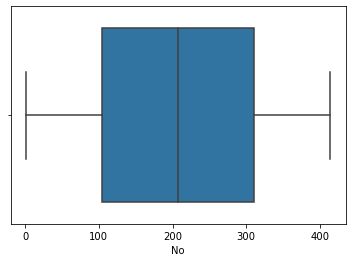

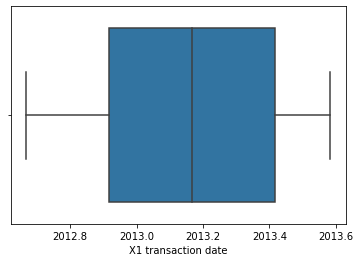

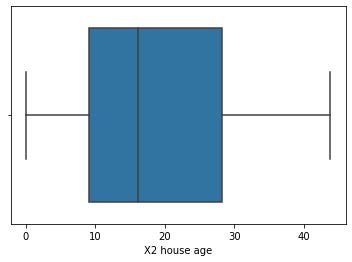

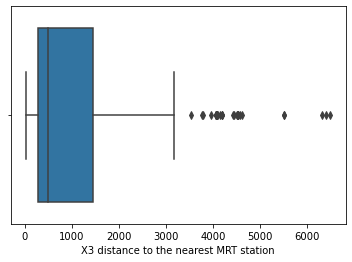

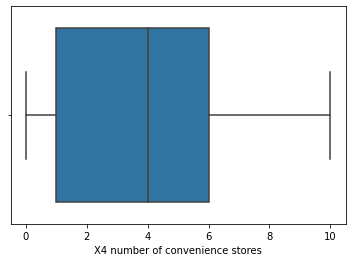

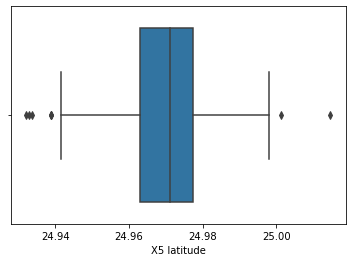

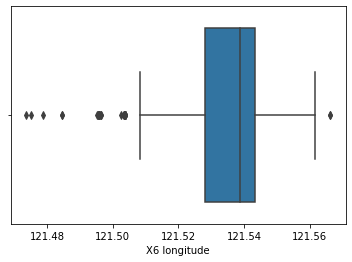

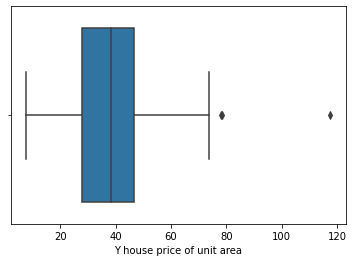

In [211]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [212]:
df['X3 distance to the nearest MRT station'].skew()

1.8887565801256057

In [213]:
df['X3 distance to the nearest MRT station']=np.log(df['X3 distance to the nearest MRT station'])

In [214]:
df['X3 distance to the nearest MRT station'].skew()

0.05269434450696422

In [215]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [216]:
col=['X6 longitude','X5 latitude','Y house price of unit area']

In [217]:
for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    df[i]=df[i].replace(df[df[i]>ub][i],df[i].quantile(0.9))
    df[i]=df[i].replace(df[df[i]<lb][i],df[i].quantile(0.01))

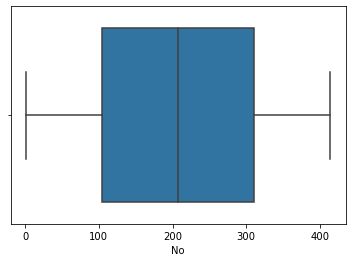

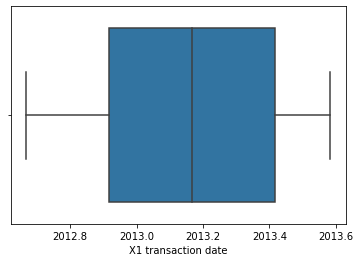

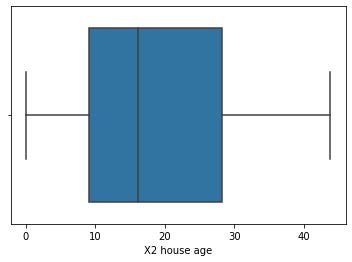

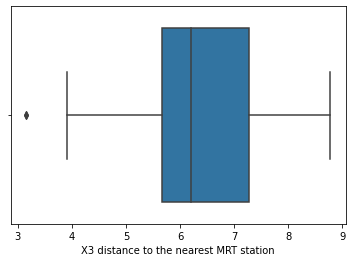

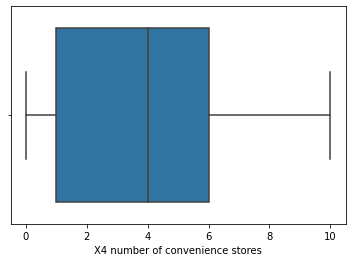

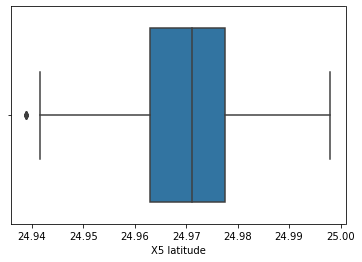

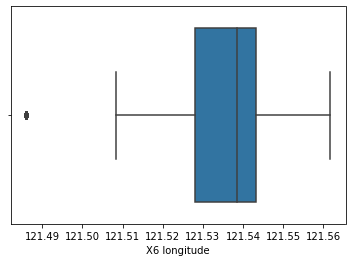

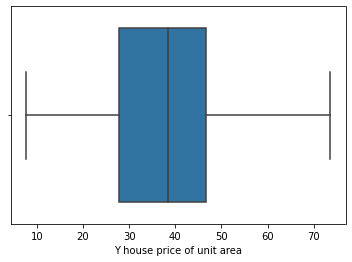

In [218]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

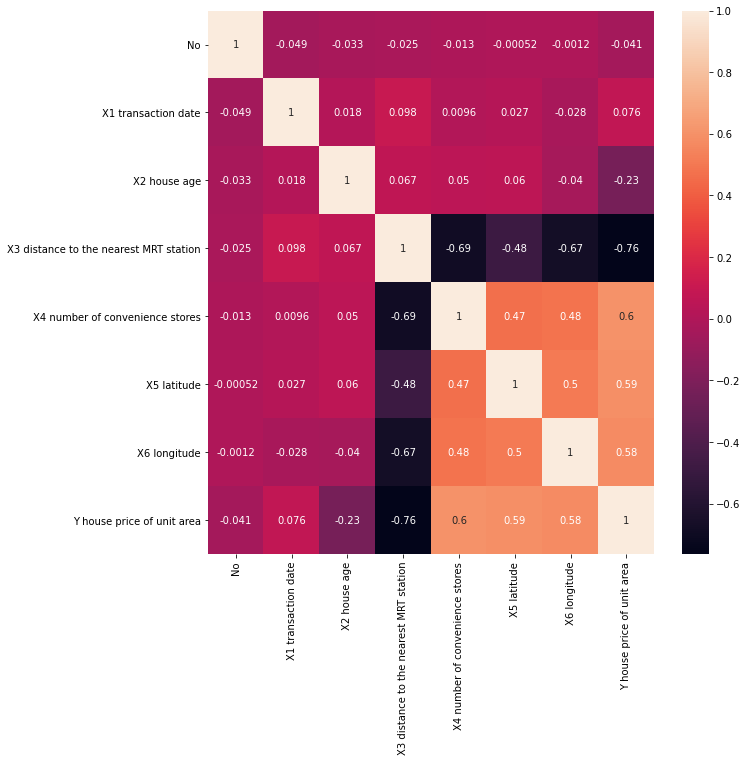

In [219]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


In [220]:
#Y house price of unit area dependant variable 
#corr of X3 distance to the nearest MRT station and Y house price of unit area is highest 
#while X1 transaction date is low corr to Y house price of unit area
#so we can drop X1 transaction date

In [221]:
df=df.drop('X1 transaction date',axis=1)

In [222]:
out=df['Y house price of unit area']
inp=df.drop('Y house price of unit area',axis=1)

In [223]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc,columns=inp.columns)



In [224]:
from sklearn.model_selection import train_test_split

In [225]:
xtrain,xtest,ytrain,ytest=train_test_split(inp_sc,out,test_size=0.3,random_state=48)

In [226]:
from sklearn.model_selection import cross_val_score

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.720
Model:                                    OLS   Adj. R-squared:                  0.714
Method:                         Least Squares   F-statistic:                     120.6
Date:                        Tue, 01 Sep 2020   Prob (F-statistic):           7.13e-75
Time:                                23:18:47   Log-Likelihood:                -966.22
No. Observations:                         289   AIC:                             1946.
Df Residuals:                             282   BIC:                             1972.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     37.4099      0.411     90.938      0.000      36.600      38.220
No                                        -0.8852      0.408     -2.169      0.031      -1.689      -0.082
X2 house age                              -3.1556      0.420     -7.512      0.000      -3.982      -2.329
X3 distance to the nearest MRT station    -6.8090      0.657    -10.360      0.000      -8.103      -5.515
X4 number of convenience stores            1.2471      0.583      2.140      0.033       0.100       2.394
X5 latitude                                3.8006      0.494      7.687      0.000       2.827       4.774
X6 longitude                               0.2946      0.537      0.549      0.583      -0.762       1.351
==============================================================================
Omnibus:                       50.811   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.394
Skew:                           0.850   Prob(JB):                     1.95e-26
Kurtosis:                       5.635   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
#rsquare 0.72 adj rsquare 0.71 hence diff is min
#rsquare value is also good
#Fstat is less than 0.05 means model coffiencents are signifincant
#pval of x5 and X6 is little high so they could be insignificant to output
#Durbin-watson is 2.023 as it should be between 1.5 to 2.5 so no auto correlation
#cond no is really high so multi collinearity is present


In [229]:
ols_mod.mse_total

167.99104626105344

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [231]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif['feature']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
2,2.572248,X3 distance to the nearest MRT station
3,2.020777,X4 number of convenience stores
5,1.806792,X6 longitude
4,1.515017,X5 latitude
1,1.032771,X2 house age
0,1.007021,No


In [232]:
inp1=xtrain.drop('X6 longitude',axis=1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif['feature']=inp1.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
3,2.018100,X4 number of convenience stores
2,2.013787,X3 distance to the nearest MRT station
4,1.424250,X5 latitude
1,1.031805,X2 house age
0,1.007010,No


In [233]:
inp2=inp1.drop('X5 latitude',axis=1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif['feature']=inp2.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
2,1.893383,X3 distance to the nearest MRT station
3,1.890152,X4 number of convenience stores
1,1.021350,X2 house age
0,1.006945,No


In [234]:
inp2.columns

Index(['No', 'X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores'],
      dtype='object')

In [235]:
inpc=sm.add_constant(inp2)
ols=sm.OLS(ytrain,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.655
Model:                                    OLS   Adj. R-squared:                  0.650
Method:                         Least Squares   F-statistic:                     134.6
Date:                        Tue, 01 Sep 2020   Prob (F-statistic):           2.50e-64
Time:                                23:18:47   Log-Likelihood:                -996.33
No. Observations:                         289   AIC:                             2003.
Df Residuals:                             284   BIC:                             2021.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     37.5760      0.454     82.743      0.000      36.682      38.470
No                                        -0.8468      0.451     -1.876      0.062      -1.735       0.042
X2 house age                              -2.8151      0.462     -6.095      0.000      -3.724      -1.906
X3 distance to the nearest MRT station    -8.1320      0.623    -13.055      0.000      -9.358      -6.906
X4 number of convenience stores            2.4238      0.623      3.890      0.000       1.197       3.650
==============================================================================
Omnibus:                       40.847   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.706
Skew:                           0.812   Prob(JB):                     1.20e-15
Kurtosis:                       4.752   Cond. No.                         2.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
#rsquare 0.65 adj rsquare 0.65 hence diff is min
#rsquare value is also good
#probability of Fstat is less than 0.05 means model coffiencents are signifincant
#Durbin-watson is 1.98 as it should be between 1.5 to 2.5 so no auto correlation
#cond no is now 2.34 so we have removed multi collinearity problem


In [237]:
ols_mod.mse_total

167.99104626105344

In [238]:
ypred=ols_mod.predict()

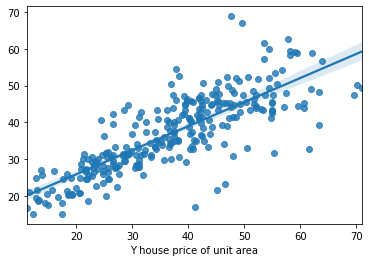

In [239]:
sns.regplot(ytrain,ypred)

In [240]:
#this represents the plot is linear between ypred and y

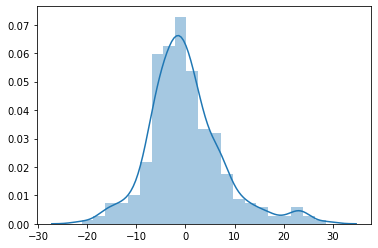

In [241]:
sns.distplot(ols_mod.resid)

In [242]:
ols_mod.resid.skew()

0.8158255549568475

In [243]:
#residue should be normal here it is right skewed 
#we can apply transformation on output variable

In [244]:
out_norm=np.sqrt(ytrain)

In [245]:
inpc=sm.add_constant(inp2)
ols=sm.OLS(out_norm,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.667
Model:                                    OLS   Adj. R-squared:                  0.662
Method:                         Least Squares   F-statistic:                     142.2
Date:                        Tue, 01 Sep 2020   Prob (F-statistic):           1.53e-66
Time:                                23:18:49   Log-Likelihood:                -278.46
No. Observations:                         289   AIC:                             566.9
Df Residuals:                             284   BIC:                             585.3
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      6.0339      0.038    159.289      0.000       5.959       6.108
No                                        -0.0633      0.038     -1.681      0.094      -0.137       0.011
X2 house age                              -0.2222      0.039     -5.769      0.000      -0.298      -0.146
X3 distance to the nearest MRT station    -0.7041      0.052    -13.552      0.000      -0.806      -0.602
X4 number of convenience stores            0.2076      0.052      3.995      0.000       0.105       0.310
==============================================================================
Omnibus:                       20.818   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.245
Skew:                           0.484   Prob(JB):                     1.64e-07
Kurtosis:                       4.287   Cond. No.                         2.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

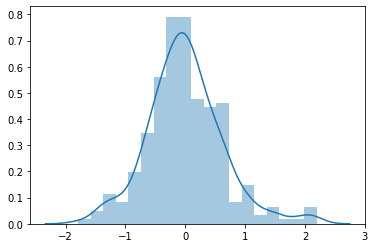

In [246]:
sns.distplot(ols_mod.resid)

In [247]:
ols_mod.resid.skew()

0.48678496515215824

In [248]:
ols_mod.mse_total

1.2116866016170365

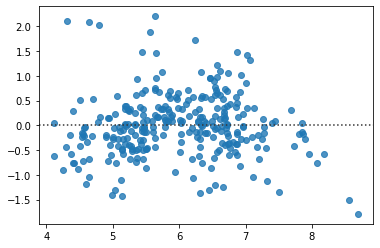

In [252]:
sns.residplot(ols_mod.predict(),ols_mod.resid)

In [251]:
#this scatter plot of ypred and resedue it should be uniform to have homoscadascity

In [253]:
#now we will feature selection for ols mod:

In [277]:
inp3=inp2.copy()

In [278]:
while(len(inp3.columns)>0):
    inp_c=sm.add_constant(inp3)
    ols=sm.OLS(out_norm,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inp3=inp3.drop(f,axis=1)
    else:
        break
print('The final features : ',inp3.columns)

The final features :  Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores'],
      dtype='object')


In [280]:
inpc=sm.add_constant(inp3)
ols=sm.OLS(out_norm,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.664
Model:                                    OLS   Adj. R-squared:                  0.660
Method:                         Least Squares   F-statistic:                     187.4
Date:                        Tue, 01 Sep 2020   Prob (F-statistic):           4.16e-67
Time:                                23:47:14   Log-Likelihood:                -279.89
No. Observations:                         289   AIC:                             567.8
Df Residuals:                             285   BIC:                             582.4
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      6.0389      0.038    159.405      0.000       5.964       6.113
X2 house age                              -0.2187      0.039     -5.668      0.000      -0.295      -0.143
X3 distance to the nearest MRT station    -0.7031      0.052    -13.490      0.000      -0.806      -0.601
X4 number of convenience stores            0.2125      0.052      4.081      0.000       0.110       0.315
==============================================================================
Omnibus:                       20.244   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.016
Skew:                           0.477   Prob(JB):                     3.04e-07
Kurtosis:                       4.258   Cond. No.                         2.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
from sklearn.linear_model import LinearRegression

In [258]:
lr_mod=LinearRegression()
lr_mod.fit(xtrain,ytrain)
ypred=lr_mod.predict(xtest)

In [264]:
r2_score_test=r2_score(ytest,ypred)
r2_score_test

0.644284881945277

In [260]:
mse_test=mean_squared_error(ytest,ypred)
mse_test

53.65914630272268

In [261]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [262]:
lr=LinearRegression()

In [295]:
lr_backward=sfs(estimator=lr,k_features=3,forward=True)

In [296]:
sfs_backward=lr_backward.fit(xtrain,ytrain)

In [297]:
sfs_backward.k_feature_names_

('X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude')

In [290]:
print('\nR-squared: ', sfs_backward.k_score_)


R-squared:  0.7047538980932897


In [303]:
int_crossval=inp_sc[['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude']]

In [310]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=int_crossval
y=out
# initialize the standard scalar
sc = StandardScaler()
# standardize all the columns of df_lifeExp
X_scaled = sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

In [311]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
mod_rid=Ridge(alpha=1,normalize=True)
res=cross_val_score(mod_rid,X_train,y_train,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(abs(res))
print(rmse.mean())
print(rmse.std())

8.232855035790456
0.626644138201551


In [318]:
rid=Ridge()
param={'alpha':[0.001,0.00001,0.01,0.0001,1,1.5,1.3,1.24,1.8,2,3,7,8,9,10,100]}
grid=GridSearchCV(rid,param_grid=param)
hyp_rid=grid.fit(int_crossval,out)

In [320]:
hyp_rid.best_params_

{'alpha': 3}

In [321]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
mod_rid=Ridge(alpha=3,normalize=True)
res=cross_val_score(mod_rid,X_train,y_train,cv=3,scoring='neg_mean_squared_error')
rmse=np.sqrt(abs(res))
print(rmse.mean())
print(rmse.std())

9.98705798047729
0.47923753009364595


In [322]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state = 1)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# predict the values of target variable using entire data
sgd_pred = linreg_with_SGD.predict(X_train)

In [327]:
rmse = (np.sqrt(mean_squared_error(y_train, sgd_pred)))
r2 = r2_score(y_train, sgd_pred)

In [329]:
r2,rmse

(0.6983941597239515, 6.955217193297818)

In [331]:
y_test_predict = linreg_with_SGD.predict(X_test)

In [332]:
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2 = r2_score(y_test,y_test_predict)

In [333]:
r2,rmse

(0.6540838801076743, 7.696748121391741)

In [338]:
sgd.score(X_train, y_train)

0.6983941597239515

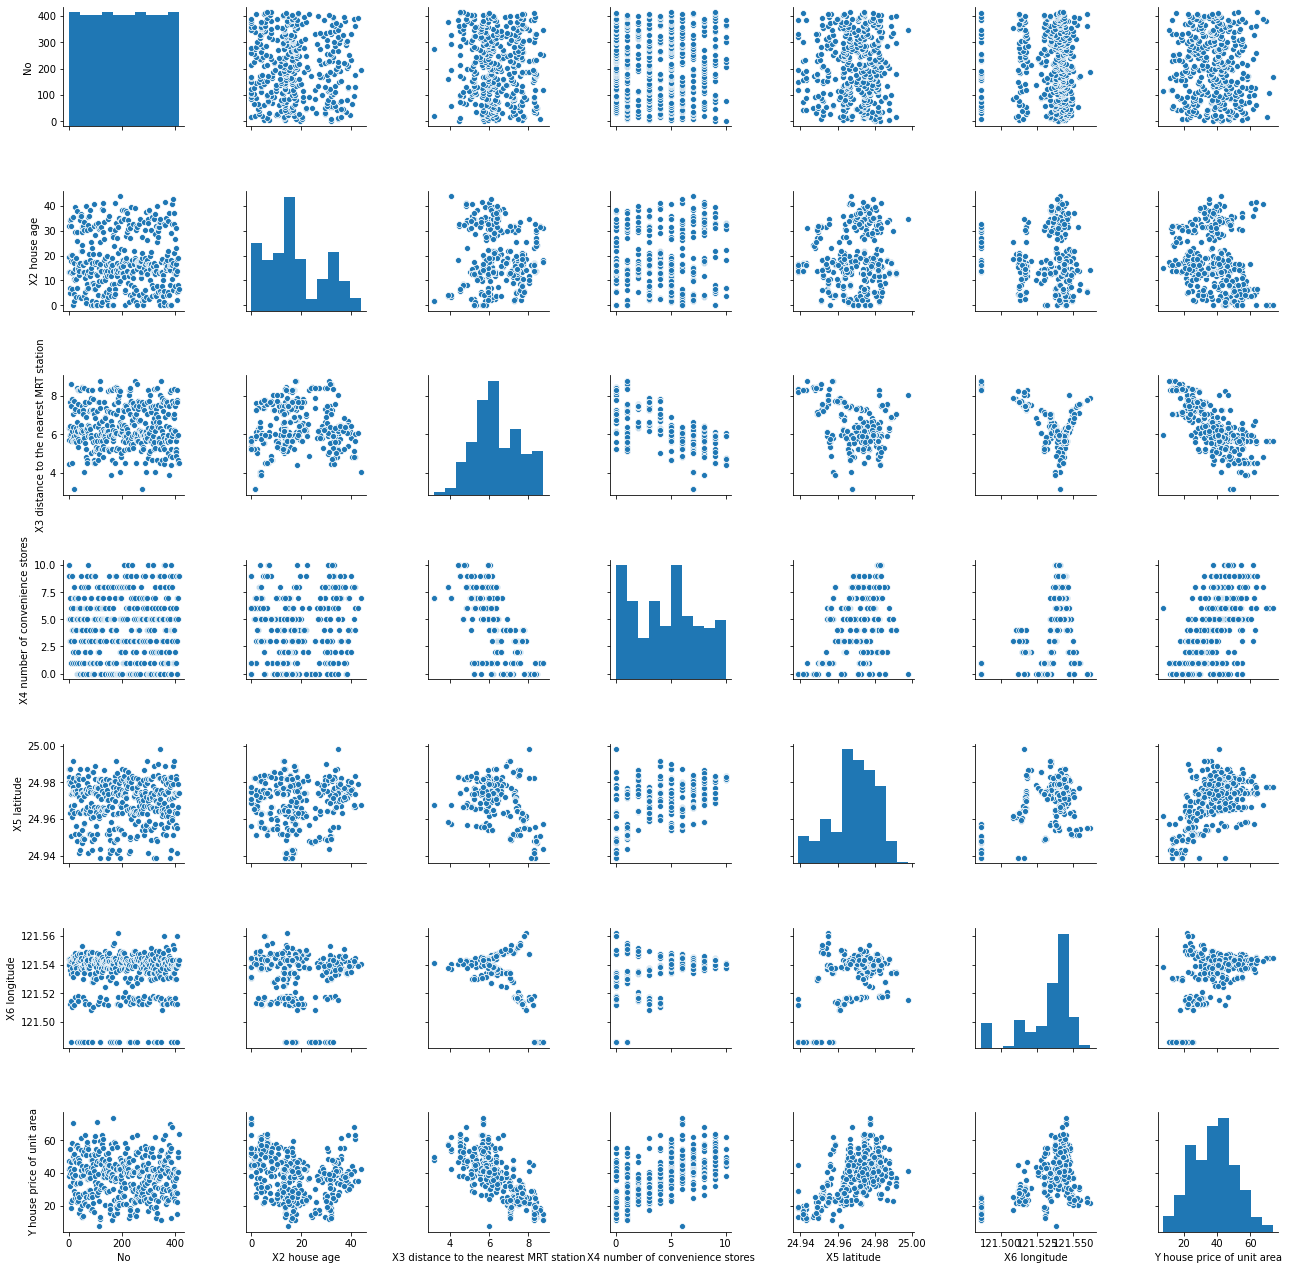

In [339]:
sns.pairplot(df)